In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#def y(x):
#    return -x/2 - (1 - np.exp(2*x))/4

def dy_dx(y, x):
    dy_dx = -x/2 - (1 - np.exp(2*x))/4
    return dy_dx

In [3]:
x_vals = np.linspace(0.,4.,100)

#y_ = y(x_vals)

y0 = 0  # y(0) = 0
y0 = [y0]

sol_odeint = odeint(dy_dx, y0, x_vals)
y_vals = sol_odeint[:, 0]

#plt.semilogy(x_vals, y_vals)
#plt.scatter(x_vals, y_vals)

In [4]:
def IntegratorAdams(f,r0,t):
    #difine el paso
    h = t[1] - t[0]

    x = np.zeros_like(t)
    #vx = np.zeros_like(t)
    x[0] = r0[0]
    #vx[0] = r0[1]
    
    for i in range(1,5):
        present = np.array([x[i-1]])#,vx[i-1]])
        
        k1 = f(present[0], h)
        k2 = f(present[0] + 0.5*h*k1, t+0.5*h) 
        k3 = f(present[0] + 0.5*h*k2, t+0.5*h)
        k4 = f(present[0] + h*k3, t+h)
        p = (k1 + 2 * k2 + 2 * k3 + k4)/6
        
        x[i] = h*p[0] + x[i-1] 
        
        #vx[i] = h*p[1] + vx[i-1]
        
    
    xc = x.copy()
    #vxc = vx.copy()
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
        
    for i in range(5,len(t)):

        present = np.array([x[i-1]])#,vx[i-1]])
        past_1 = np.array([x[i-2]])#,vx[i-2]])
        past_2 = np.array([x[i-3]])#,vx[i-3]])
        past_3 = np.array([x[i-4]])#,vx[i-4]])
        past_4 = np.array([x[i-5]])#,vx[i-5]])
        
        K11 = f(present,t[i-1])
        K12 = f(past_1,t[i-2])
        K13 = f(past_2,t[i-3])
        K14 = f(past_3,t[i-4])
        K15 = f(past_4,t[i-5])
        
        x[i] =   x[i-1] + h*((1901)*K11 -(2774)*K12 +(2616)*K13 -(1274)*K14 +(251)*K15 )/720
        #vx[i] = vx[i-1] + h*((1901)*K11[1]-(2774)*K12[1]+(2616)*K13[1]-(1274)*K14[1]+(251)*K15[1])/720
        
        xc[i] = x[i]
        #vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([x[i]])#,vx[i]])
        Kmulton = f(futuro,t[i])
        
        xc[i] =  xc[i-1] + h*((475)*Kmulton +(1427)*K11 -(798)*K12 +(482)*K13 -(173)*K14 +(27)*K15 )/1440
        #vxc[i] = vxc[i-1] + h*((475)*Kmulton[1]+(1427)*K11[1]-(798)*K12[1]+(482)*K13[1]-(173)*K14[1]+(27)*K15[1])/1440
        
    return x, xc#vx,xc,vxc

In [5]:
t = np.linspace(0.,4.,100)
r0 = [0.,0.]
sol = IntegratorAdams(dy_dx,r0,t)

<function matplotlib.pyplot.show(close=None, block=None)>

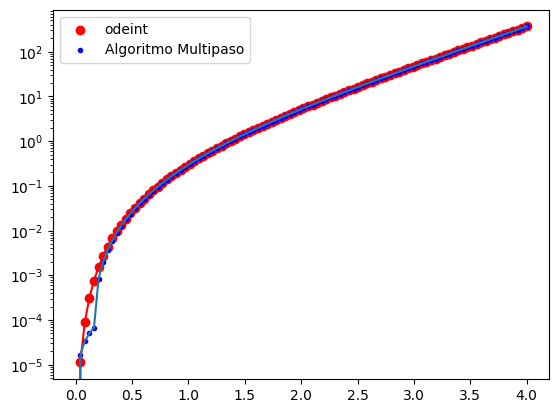

In [6]:
plt.semilogy(x_vals, y_vals, color='r')
plt.scatter(x_vals, y_vals, color='r', label='odeint')

plt.semilogy(t,sol[1])
plt.scatter(t,sol[1],marker='.',color='b', label='Algoritmo Multipaso')

plt.legend()
plt.show

Se puede observar que los primeros pasos tienen un error mayor a los siguientes, esto debido al uso de Runge-Kutta.